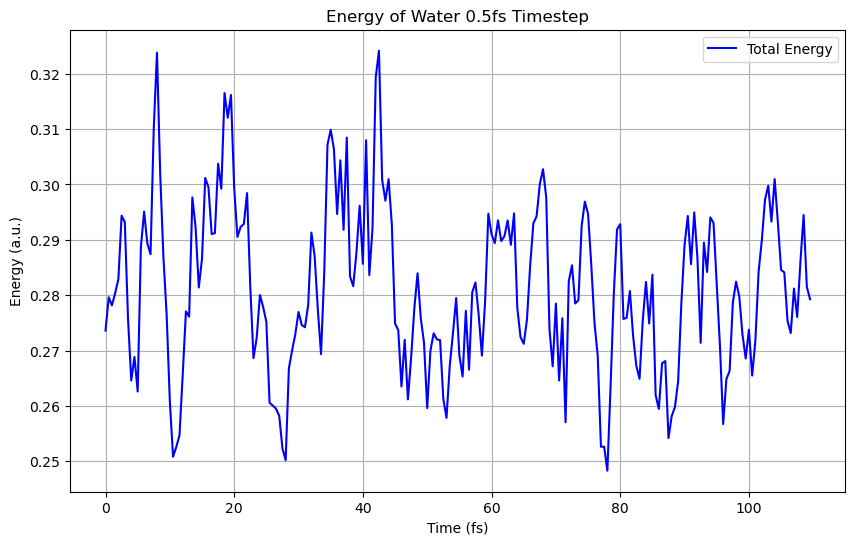

<Figure size 640x480 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt

# Define the path to the .ener file
ener_file = '../Runs/Water/water_aimd_1ns_every0.5fs-1.ener'

# Read the file
time = []
total_energy = []
kinetic_energy = []
potential_energy = []
temperature = []
pressure = []

# Read each line from the .ener file
with open(ener_file, 'r') as file:
    for line in file:
        # Skip comments
        if line.startswith('#'):
            continue
        
        # Split the line into values and append to lists
        data = line.split()
        time.append(float(data[1]))  # Time in ps
        #total_energy.append(float(data[1]))  # Total Energy in a.u.
        kinetic_energy.append(float(data[2]))  # Kinetic Energy in a.u.
        potential_energy.append(float(data[4]))  # Potential Energy in a.u.
        temperature.append(float(data[3]))  # Temperature in K
        total_energy.append(potential_energy[-1] + kinetic_energy[-1])

# Plot the Total Energy vs Time
plt.figure(figsize=(10,6))
plt.plot(time, kinetic_energy, label='Total Energy', color='blue')
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
plt.title('Energy of Water 0.5fs Timestep')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('Water_AIMD.png')

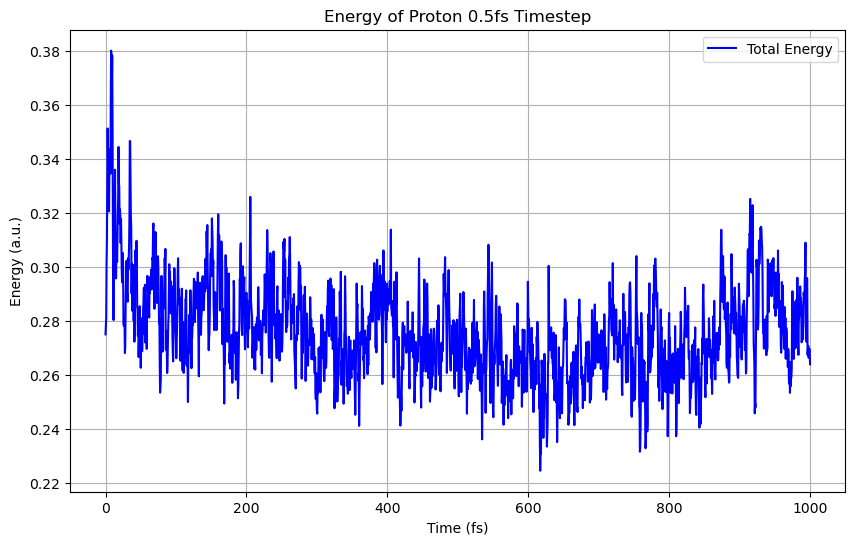

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

# Define the path to the .ener file
ener_file = '../Runs/Protons/water_aimd_1ns_every0.5fs-1.ener'
# Output files were misnamed in sbatch

# Read the file
time = []
total_energy = []
kinetic_energy = []
potential_energy = []
temperature = []
pressure = []

# Read each line from the .ener file
with open(ener_file, 'r') as file:
    for line in file:
        # Skip comments
        if line.startswith('#'):
            continue
        
        # Split the line into values and append to lists
        data = line.split()
        time.append(float(data[1]))  # Time in ps
        #total_energy.append(float(data[1]))  # Total Energy in a.u.
        kinetic_energy.append(float(data[2]))  # Kinetic Energy in a.u.
        potential_energy.append(float(data[4]))  # Potential Energy in a.u.
        temperature.append(float(data[3]))  # Temperature in K
        total_energy.append(potential_energy[-1] + kinetic_energy[-1])

# Plot the Total Energy vs Time
plt.figure(figsize=(10,6))
plt.plot(time, kinetic_energy, label='Total Energy', color='blue')
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
plt.title('Energy of Proton 0.5fs Timestep')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('Proton_AIMD.png')

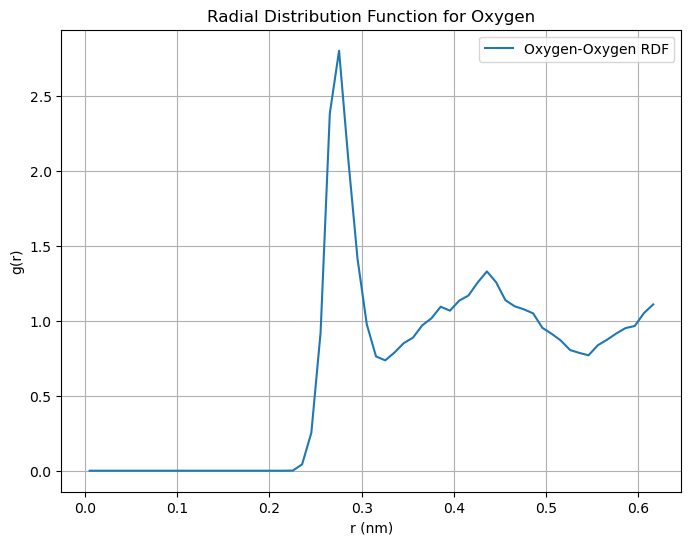

<Figure size 640x480 with 0 Axes>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
from itertools import combinations
# Load the trajectory
traj = md.load("../Runs/Protons/Proton_Pdb.pdb", top="../Runs/Protons/Proton_Pdb.pdb")  # Replace with actual path
# Define cubic box manually
box_size = 1.242  # Replace with your actual box size in nm
unit_cell_vector = np.array([[box_size, 0, 0], [0, box_size, 0], [0, 0, box_size]])
# Set unit cell vectors for each frame
traj.unitcell_vectors = np.tile(unit_cell_vector, (traj.n_frames, 1, 1))
# Get oxygen indices
oxygen_indices = [atom.index for atom in traj.topology.atoms if atom.element.symbol == "O"]
# Generate oxygen pairs
oxygen_pairs = list(combinations(oxygen_indices, 2))
# Compute RDF
bin_width = 0.01  # Adjust bin width as needed
radii, gr = md.compute_rdf(traj, pairs=oxygen_pairs, bin_width=bin_width, r_range=(0.0, box_size / 2.0))
# Plot g(r)
plt.figure(figsize=(8, 6))
plt.plot(radii, gr, label="Oxygen-Oxygen RDF")
plt.xlabel("r (nm)")
plt.ylabel("g(r)")
plt.title("Radial Distribution Function for Oxygen")
plt.legend()
plt.grid()
plt.show()
plt.savefig('Radial_Distribution_Excess_Proton.png')